## Ramon Brand - Session 2 - NMist with fashion images
### Overview
The idea of this exercise is to train a neural network using the fashion data set. It includes 60,000 images of training data and 10,000 images of test data.

### Part 1 - Loading and Studying the data
First we load and see how the data looks.

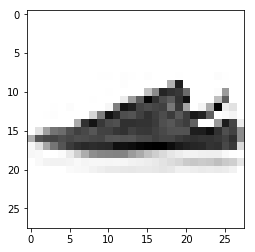

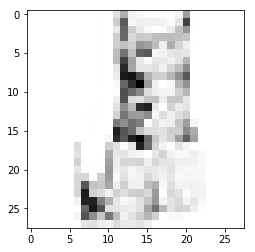

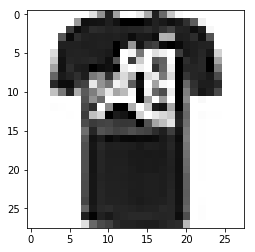

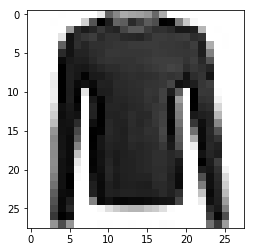

[  0   0   0   0   0   0   0   0   1   0   0 153 133 163 149  10  52  24
  34  86 120  20   0   0   0   0   0   0]


In [13]:
import numpy as np
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import mnist_reader

# -- Load image
x_train, y_train = mnist_reader.load_mnist('', kind='train')
x_test, y_test = mnist_reader.load_mnist('', kind='t10k')

# -- Reshape for the images
x_train = x_train.reshape((60000, 28, 28))

# -- Plot
plt.imshow(x_train[6], cmap="Greys")
plt.show()

plt.imshow(x_train[6256], cmap="Greys") # <- I have no clue what this thing is. A shoe? Boot? Maybe a dress?
#If the network gets 6256 correct, computers are taking over.
plt.show()

plt.imshow(x_train[47252], cmap="Greys")
plt.show()

plt.imshow(x_train[55214], cmap="Greys")
plt.show()

# -- Print line 14 of the mystical 6256
print(x_train[6256][14])

This is quite interesting, as we can notice that the resolution is very low for objects that are quite complicated. This might be quite tough.

From the line 14 print we can also see we need to normalize the values and change their type.

### Part 2 - Training the network
Now we will start training the network.

In [35]:
import numpy as np
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import mnist_reader
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# -- Load image
x_train, y_train = mnist_reader.load_mnist('', kind='train')
x_test, y_test = mnist_reader.load_mnist('', kind='t10k')

# -- Change type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# -- Normalize
x_train /= 255
x_test /= 255

# -- Change results to category one hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# -- Create model -- Same as our last successful model using normal MNIST digits
model = Sequential()

# -- First layer
model.add(Dense(400, input_shape=(28 * 28,), activation="relu"))

# -- Second layer
model.add(Dense(100, input_shape=(400,), activation="relu"))

# -- Last layer
model.add(Dense(10, input_shape=(100,), activation="softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()
hist = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test,y_test))

score = model.evaluate(x_test, y_test)
print("Loss: ", score[0])
print("Accuracy: ", score[1])

# The moment of truth, can we predict 6256 - I know this was training data, but just for fun we can see if it works.
prediction = x_train[6256:6257] # The range is needed to maintain the shape for model.predict()
cat = np.argmax(model.predict(prediction), axis=1)

targetCat = np.argmax(y_train[6256], axis=0)
print("Predicted category of 5256 is: ", cat[0], " Actual category is: ", targetCat)

if cat[0] == targetCat:
    print("The world is ending!!!")
else:
    print("We can still breath for awhile...")
    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_86 (Dense)             (None, 100)               40100     
_________________________________________________________________
dense_87 (Dense)             (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 80us/step - loss: 0.8103 - acc: 0.7459 - val_loss: 0.5850 - val_acc: 0.8025
Epoch 2/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.5226 - acc: 0.8221 - val_loss: 0.5279 - val_acc: 0.8170
Epoch 3/10
60000/60000 [==============================] - 4s 67us/step - los

The accuracy is clearly less than that of the standard MNIST, at only 0.85 compared to 0.95, however, considering the obscurity of some of the images, as we can see with 6256, I think this is very impressive, especially for a network that takes only a few seconds to train.

### Part 3 - Results
Here we plot some graphs to show the accuracy of the model increase as the epochs tick by, and also the loss decrease. There is an interesting dip in accuracy at epoch 4.

I am not sure how to determine when to use more epochs with a higher batch size, or when to use fewer epochs with a lower batch size, but for now I thought that 10 epochs with a batch size of 64 is sufficient.

However, looking at the graph


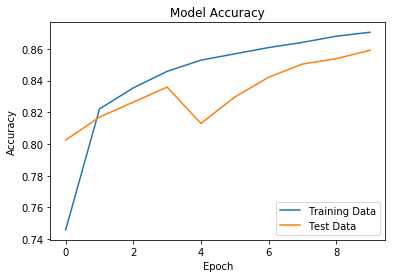

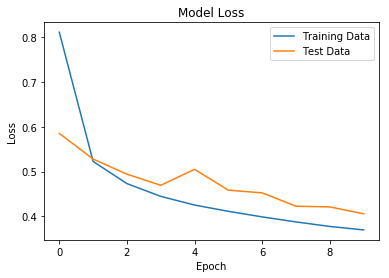

{'val_loss': [0.5850495421409607, 0.5279389678001404, 0.49425891284942625, 0.46950180830955507, 0.5049727722167969, 0.45865174808502196, 0.4525689670562744, 0.4228531529188156, 0.4213493302822113, 0.4059213357925415], 'val_acc': [0.8025, 0.817, 0.8264, 0.8359, 0.813, 0.8296, 0.8421, 0.8504, 0.8538, 0.8591], 'loss': [0.810328309472402, 0.5225842030843099, 0.473241939385732, 0.44484364221890765, 0.4255141772270203, 0.4114900638580322, 0.39909322498639427, 0.3879163535753886, 0.3778017402331034, 0.37009573027292886], 'acc': [0.7458666666666667, 0.8221333333333334, 0.8353833333333334, 0.8458166666666667, 0.8528666666666667, 0.85685, 0.8608, 0.8640666666666666, 0.86795, 0.8704666666666667]}


In [43]:
import matplotlib.pyplot as plt

plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training Data", "Test Data"], loc="lower right")
plt.show()

plt.plot(hist.history["loss"])
plt.plot(hist.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training Data", "Test Data"], loc="upper right")
plt.show()